# STAT 201: Group 29 Project Proposal
##### Brian Moniaga, Jiahe Jiang, Jiakang Huang, Nolan Vibhakar
##### Date: October 29th, 2023

In [1]:
# Use the library function to load the R packages
library(tidyverse)
library(repr)
library(readxl)
library(cowplot)
library(RColorBrewer)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ──────────────────────

## Import packages:

## Introduction:
Investigating the factors that affect students' academic grades is a crucial area of research with significant implications for educational institutions, policymakers, and society as a whole. Understanding these factors can help us estimate educational outcomes for students. Several published journals and studies highlight the importance of this research area. One of these aspects is their impact on graduation rates. A study by Pascarella and Terenzini (2005) emphasizes that academic performance is a strong predictor of whether a student will complete their degree. Furthermore, investigating these factors can make us aware of educational inequalities. A research paper by Reardon (2011) claims that students from different socioeconomic backgrounds often face disparities in academic achievement. Last but not least, Makewa et al.(2012) propose that parents might also have an impact on students' grades. To conduct further investigation, we obtained a dataset from UCI. This dataset considers 31 factors related to the academic success of 145 students. Specifically, our focus will be on parental features. By analyzing the data, we can effectively assess students' end-of-term performances based on their parents' circumstances.

## Data Analysis:

In [65]:
# Read the CSV file
student_data <- read_csv("student.csv", col_names = TRUE, show_col_types = FALSE) |>
    select(Mothers_Education, Fathers_Education, CGPA_Last_Semester, Expected_CGPA_On_Graduation) |>
    mutate(high_education_family = if_else(Mothers_Education > 3 | Fathers_Education > 3, TRUE, FALSE))
head(student_data, 5)

Mothers_Education,Fathers_Education,CGPA_Last_Semester,Expected_CGPA_On_Graduation,high_education_family
<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,2,1,1,FALSE
2,3,2,3,FALSE
2,2,2,2,FALSE
1,2,3,2,FALSE
3,3,2,2,FALSE


#### There are 145 students contained in this dataset
* Mothers_Education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
* Fathers_Education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
* CGPA_Last_Semester(/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
* Expected_CGPA_On_Graduation(/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
* high_education_family: A student is considered to be from a high-education family if **at least one** of their parents has attended university.

high_education_family,count,mean,sd
<lgl>,<int>,<dbl>,<dbl>
FALSE,102,3.186275,1.224586
TRUE,43,2.976744,1.471772


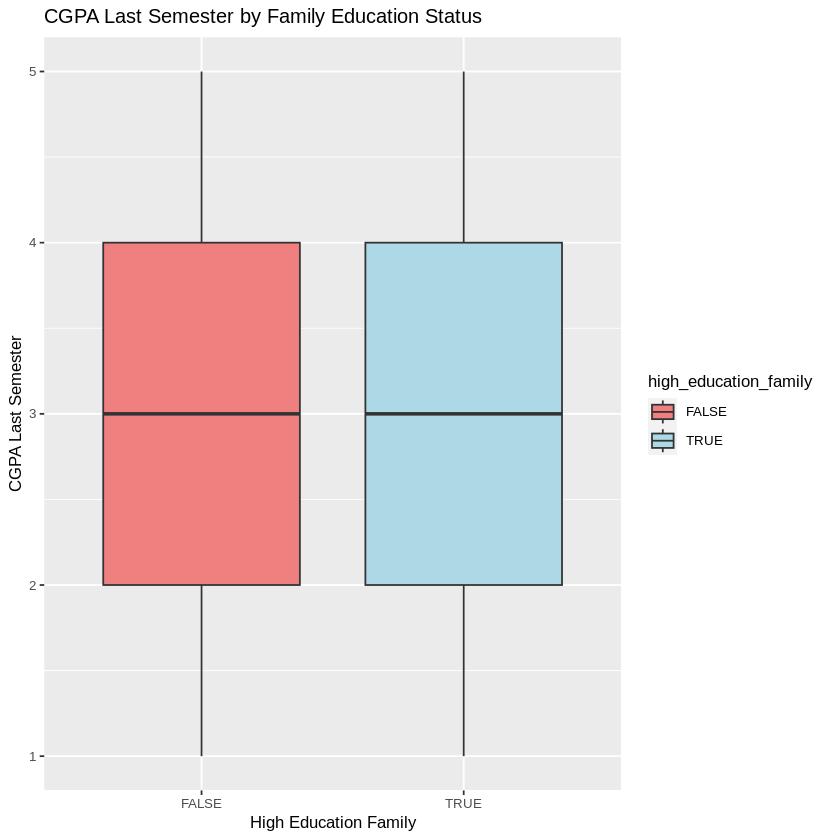

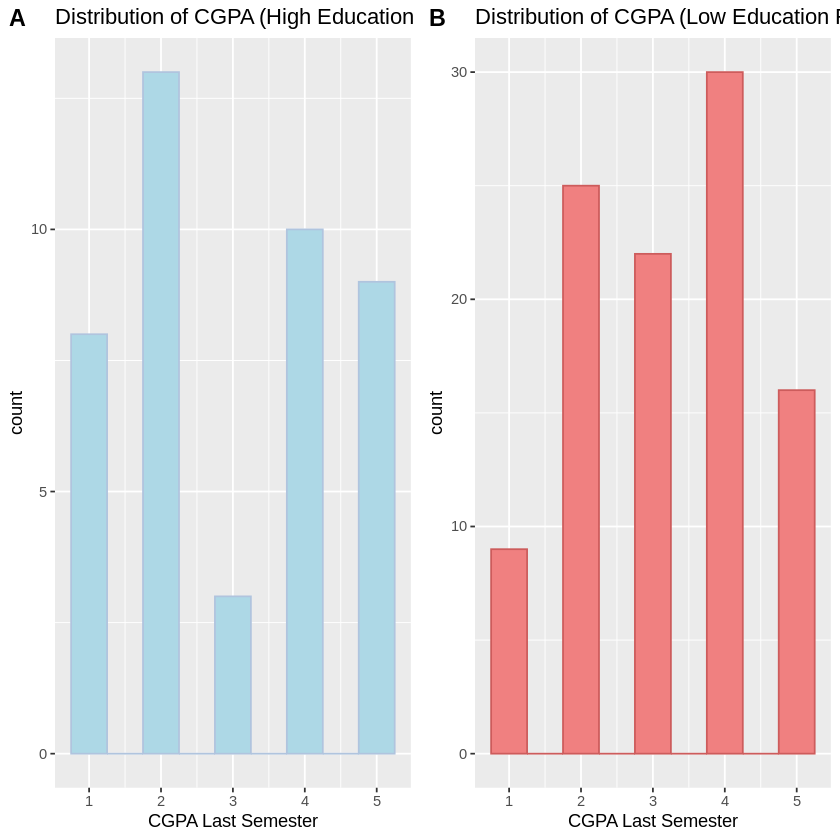

In [70]:
# Summary by high education family status
Summary_Family_Education_CGPA_Last_Semester <- 
    student_data |>
    group_by(high_education_family) |>
    summarize(count = n(),
              mean = mean(CGPA_Last_Semester, na.rm = TRUE), 
              sd = sd(CGPA_Last_Semester, na.rm = TRUE)) 

# Histogram for High Education Family CGPA Last Semester
histogram_High_Education_CGPA_Last_Semester <- 
    student_data |>
    filter(high_education_family == TRUE) |> 
    ggplot(aes(x = CGPA_Last_Semester)) +
    geom_histogram(binwidth = 0.5, fill = "#add8e6", color = "#b0c4de") + 
    labs(x = "CGPA Last Semester", title = "Distribution of CGPA (High Education Families)")

# Histogram for Low Education Family CGPA Last Semester
histogram_Low_Education_CGPA_Last_Semester <- 
    student_data |>
    filter(high_education_family == FALSE) |> 
    ggplot(aes(x = CGPA_Last_Semester)) +
    geom_histogram(binwidth = 0.5, fill = "#f08080", color = "#cd5c5c") + 
    labs(x = "CGPA Last Semester", title = "Distribution of CGPA (Low Education Families)")

# Boxplots for Family Education vs CGPA Last Semester
boxplots_Family_Education_CGPA_Last_Semester <- 
    student_data |>  
    ggplot(aes(x = as.factor(high_education_family), y = CGPA_Last_Semester, fill = high_education_family)) + 
    geom_boxplot() +
    scale_fill_manual(values = c("#f08080", "#add8e6")) + 
    labs(x = "High Education Family", y = "CGPA Last Semester", title = "CGPA Last Semester by Family Education Status") 

# Combine histograms into a grid
plot_grid <- plot_grid(histogram_High_Education_CGPA_Last_Semester, 
                       histogram_Low_Education_CGPA_Last_Semester,
                       labels = "AUTO", ncol = 2, align = 'h')

# Print summary, boxplots, and the combined grid of histograms
Summary_Family_Education_CGPA_Last_Semester
boxplots_Family_Education_CGPA_Last_Semester
plot_grid

## Methods:

## Expected outcomes and significance:
#### Expected outcomes:

#### Impact of Findings:

#### For Future:


## Work Cited:
1. Makewa, L. N., Role, E., & Otewa, F. (2012). Parental factors affecting academic achievement of grade six pupils in Kisumu city, Kenya. International Journal of Asian Social Science, 2(11), 1984-1997.

2. Pascarella, E. T., & Terenzini, P. T. (2005). How College Affects Students: A Third Decade of Research. Volume 2. Jossey-Bass, An Imprint of Wiley. 10475 Crosspoint Blvd, Indianapolis, IN 46256.

3. Reardon, S. F. (2011). The widening academic achievement gap between the rich and the poor: New evidence and possible explanations. Whither opportunity, 1(1), 91-116.